# Illustrations for Gradient Descent
Author: Joerg Kienitz (finciraptor.de, https://github.com/Lapsilago) for the workshop Machine Learning for Option Pricing, Calibration and Hedging Workshop with Nikolai Nowaczyk ( https://github.com/niknow; https://github.com/niknow/machine-learning-examples )

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

### Gradient Descent

<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization technique that finds a local minimum of a function. 
To find it, the function "steps" in the  direction of the steepest negative direction of the gradient.
The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $grad_k$ = -$grad f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; choose $\alpha_k$ to minimize $f(x_k+\alpha_k grad_k)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha_k grad_k$ <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

As a simple example, let's find a local minimum for the function $f(x) = x^4-2x^2 - 0.5 x+2 + \sin(x)^2$

In [4]:
f = lambda x: x**4-2*x**2 - 0.5*x + 2 + np.sin(x)**2

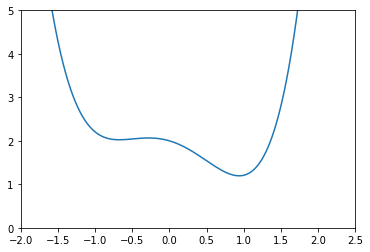

In [5]:
x = np.linspace(-2,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-2,2.5])
plt.ylim([0,5])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.0 but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

In [6]:
# hands on simple implementation of the gradient descent algorithm
w_0 = 2               # The algorithm starts at x=2
alpha = 0.1           # learning rate / step size
precision = 0.0001    # break criteria
n_steps = 100         # break criteria

x_list, y_list = [w_0], [f(w_0)]

# returns the value of the derivative of our function
def f_prime(x):
    return 4*x**3-4*x - 0.5 + 2 * np.sin(x) * np.cos(x)

n = 0                 # number of iterations
x_old = w_0           # set the starting value

# first iteration to find the new value
ngrad = -f_prime(x_old)        # gradient calculation
x_new = x_old + alpha * ngrad  # the newly suggested value

while (abs(x_new - x_old) > precision) and (n<n_steps-1):   # stopping criteria
    n = n+1                         # increase iterations
    x_old = x_new                   # store current x value
    ngrad = -f_prime(x_old)          # gradient calculation
    x_new = x_old + alpha * ngrad   # the newly suggested value 
    x_list.append(x_new)            # append for plotting 
    y_list.append(f(x_new))         # append for plotting

# print solution
print("Local minimum calculated (x value):", x_new)
print("Number of steps to convergence:", len(x_list))

Local minimum calculated (x value): 0.9374670913810693
Number of steps to convergence: 49


Play around with the precision, steps and learning rate or the initial value

The figures below show the route that was taken to find the local minimum.

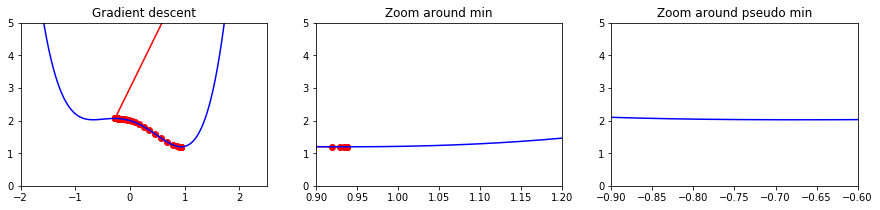

In [7]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,2.5])
plt.ylim([0,5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.9,1.2])
plt.ylim([0,5])
plt.title("Zoom around min")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-0.9,-0.6])
plt.ylim([0,5])
plt.title("Zoom around pseudo min")
plt.show()

We fixed the size of the step size, aka learning rate to a constant value. This might not be the best idea and may effects the search for the minimum. An idea for improving this might be to take larger steps when far away from the minimum and smaller ones close to the minimum.  

Warning: The gradient descent is not guaranteed to converge! If it converges it may not find the global minimum but got stuck in a local one!

Solution: Vary the step size using adaptive methods or calculating an optimal step size!

In [8]:
# we setup this function to pass into the fmin algorithm
def stepsize(n,x,s):
    x = x + n*s
    return f(x)

w_0 = 2 # The algorithm starts at x=2
precision = 0.00001
n_steps = 50

x_list, y_list = [w_0], [f(w_0)]

# returns the value of the derivative of our function
def f_prime(x):
    return 4*x**3-4*x - 0.5 + 2 * np.sin(x) * np.cos(x)

n = 0                 # number of iterations
x_old = w_0           # set the starting value

# first iteration to find the new value
s_k = -f_prime(x_old)        # gradient calculation
alpha_calc = fmin(stepsize,precision,(x_old,s_k), full_output = False, disp = False)
x_new = x_old + alpha_calc * s_k  # the newly suggested value

while (abs(x_new - x_old) > precision) and (n<n_steps-1):   # stopping criteria
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function to find ideal step size.
    alpha_calc = fmin(stepsize,precision,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + alpha_calc * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print("Local minimum occurs at ", float(x_new))
print( "Number of steps:", len(x_list))

Local minimum occurs at  0.937221769739723
Number of steps: 2


With adaptive step sizes the method may converge faster - but finding the adaptive step size might take some computational time. In our experiment the following graphs illustrate this. 

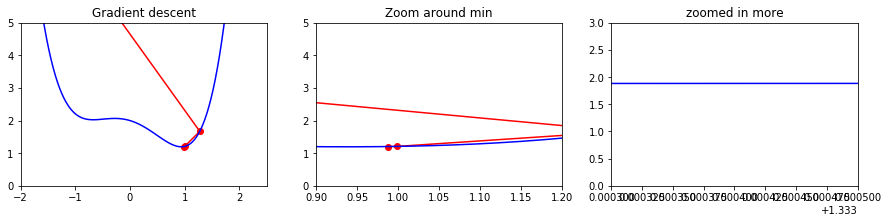

In [12]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,2.5])
plt.ylim([0,5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.9,1.2])
plt.ylim([0,5])
plt.title("Zoom around min")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

Another approach to update the step size is choosing a decrease constant $dec$ that shrinks the step size over time:
$\alpha(t+1) = \alpha(t) / (1+t \cdot dec)$.

In [13]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.17 # step size
precision = 0.1
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 4*x**3-4*x - 0.5 + 2 * np.sin(x) * np.cos(x)
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    ngrad = -f_prime(x_old)
    x_new = x_old + n_k * ngrad
    x_list.append(x_new)
    y_list.append(f(x_new))
    n_k = n_k / (1 + t * d)
    t += 1

print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 0.9874558760109118
Number of steps: 5


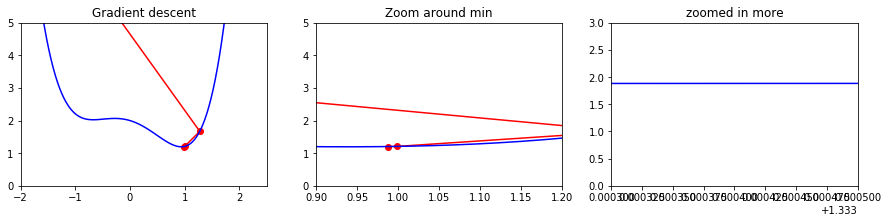

In [14]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,2.5])
plt.ylim([0,5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.9,1.2])
plt.ylim([0,5])
plt.title("Zoom around min")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.3333,1.3335])
plt.ylim([0,3])
plt.title("zoomed in more")
plt.show()

We consider linear regression where efficient solutions exist and we do not need a numerical solver using gradient descent.

We generate some data points and apply the method

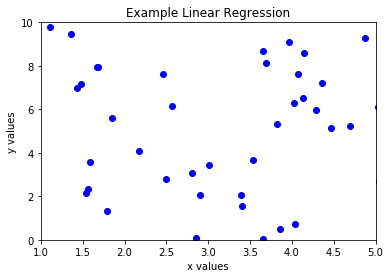

In [15]:
#Create data set
u01 = [0, -0.5] + np.random.rand(50,2)

data = [1, 5] + [5, 10] * u01

#Plot the data
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('Example Linear Regression')
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim([1,5])
plt.ylim([0,10])
plt.show()

Our goal is to find the equation of the straight line $l_\alpha(x) = \alpha_0 + \mu_1 x$ that best fits our data points. The function that we are trying to minimize in this case is:

$Loss(\alpha_0,\alpha_1) = {1 \over 2m} \sum\limits_{i=1}^m (l_\mu(x_i)-y_i)^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \alpha_0} Loss(\alpha_0,\alpha_1) = \frac{1}{m}  \sum\limits_{i=1}^m (l_\alpha(x_i)-y_i)$

$\frac{\partial}{\partial \alpha_1} Loss(\alpha_0,\alpha_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((l_\alpha(x_i)-y_i) \cdot x_i)$

Below, we set up our function for l, Loss and the gradient:

In [20]:
# linear function
l = lambda alpha_0,alpha_1,x: alpha_0 + alpha_1*x

# mean squared differences
def msqd(x,y,m,alpha_0,alpha_1):
    returnValue = 0
    for i in range(m):
        returnValue += (l(alpha_0,alpha_1,x[i])-y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

# gradients
def grad_msqd(x,y,m,alpha_0,alpha_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] += (l(alpha_0,alpha_1,x[i])-y[i])
        returnValue[1] += (l(alpha_0,alpha_1,x[i])-y[i])*x[i]
    returnValue = returnValue/(m)
    return returnValue

In [21]:
# to speed up we take
x = data[:, 0]
y = data[:, 1]
m = len(x)

We run our gradient descent algorithm (without adaptive step sizes in this example):

In [26]:
alpha_new = np.array([4.0,0.2]) # The starting values
alpha = 0.001                   # step size
precision = 0.0001              # stopping rule
n_steps = 10000                 # stopping rule

num_steps = 0                   # counter for steps
ngrad = float("inf")            # stores the gradient

while (np.linalg.norm(ngrad) > precision) and (num_steps < n_steps):  # for stopping
    num_steps += 1
    alpha_old = alpha_new                              # store the current values
    ngrad = -grad_msqd(x,y,m,alpha_old[0],alpha_old[1])   # calculate the gradient
    alpha_new = alpha_old + alpha * ngrad              # update due to gradient

print("Local minimum: alpha_0 =", alpha_new[0],"alpha_1 =", alpha_new[1])
print("No of steps",num_steps)

Local minimum: alpha_0 = 4.601996694119921 alpha_1 = 0.17194658082243128
No of steps 10000


The method is very slow indeed and depends on the chosen initial values. For comparison we may consider the values for the linear regression $\alpha_0$ and $\alpha_1$ that are calculated with the standard techniques...

In [27]:
actualvalues = sp.stats.linregress(x,y)
print("Actual values for alpha are:", "alpha_0 =", actualvalues.intercept, "alpha_1 =", actualvalues.slope)

Actual values for alpha are: alpha_0 = 4.822318363640957 alpha_1 = 0.11847746555299522


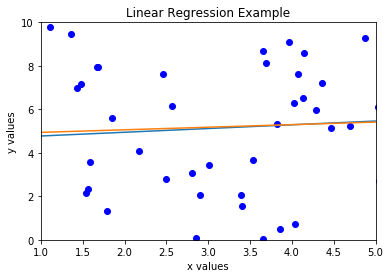

In [28]:
xx = np.linspace(0,5,1000)
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.plot(xx,l(alpha_new[0],alpha_new[1],xx))
plt.plot(xx,l(actualvalues.intercept,actualvalues.slope,xx))
plt.xlim([1,5])
plt.ylim([0,10])
plt.title('Linear Regression Example')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

We calculate the gradient for every step running through the algorithm. This may not be a big issue when the dimensionality is small but think of real life situations with a large dimensionality...

In machine learning, the algorithm above is often called <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

### Stochastic gradient descent

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two alpha values as follows:

$\frac{\partial}{\partial \alpha_0} Loss(\alpha_0,\alpha_1) = \frac{1}{m}  \sum\limits_{i=1}^m (l_\alpha(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} Loss(\alpha_0,\alpha_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((l_\alpha(x_i)-y_i) \cdot x_i)$

Where $l_\alpha(x) = \alpha_0 + \alpha_1 x$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $grad_k$ = -$grad f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha grad_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 15 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \alpha_{1} \\ 
 \alpha_2 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \alpha_1 \\ 
 \alpha_2 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(l_\alpha(x_i)-y_i) \\ 
 2x_i(l_\alpha(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

With stochastic gradient descent you run through the entire data set 1 to 10 times - see value for k in the pseudocode. But it depends on how fast the data is converging and it may be chosen with regard to the number of data in the set.

With BGD we must run through the entire data set before we make any progress. With SGD we make progress immediately and continue to make progress by stepping through the entire set. Therefore, SGD is often preferred when dealing with large data sets. However, to profit from the both (GD and SGD) a hybrid method called Minibatch Gradient Descent is often used!

Unlike GD, SGD tends to oscillate <i>close to</i> a minimum value rather than continuously approxing it and may never converge to the minimum. One way around this is to slowly decrease the step size $\alpha$ as the algorithm runs. However, this is less common than using a fixed $\alpha$.

Example for SGD for linear regression with 500.000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100 is considered.

In [29]:
f = lambda x: x*1.35+23+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

In [30]:
xxnew = np.arange(0,len(x))

We randomly shuffle around the dataset. 
Hint: In this example this step isn't strictly necessary since the data is already in a random order but for real life data this may not always be the case!

In [31]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = xxnew
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [35]:
l = lambda alpha_0,alpha_1,x: alpha_0 + alpha_1*x
Loss = lambda alpha_0,alpha_1, x_i, y_i: 0.5*(l(alpha_0,alpha_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [37]:
alpha_old = np.array([0.,0.])
alpha_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
grad_k = np.array([float("inf"),float("inf")])
sum_loss = 0
loss_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        alpha_old = alpha_new
        grad_k[0] = (l(alpha_old[0],alpha_old[1],x[i])-y[i])
        grad_k[1] = (l(alpha_old[0],alpha_old[1],x[i])-y[i])*x[i]
        grad_k = (-1)*grad_k
        alpha_new = alpha_old + n_k * grad_k
        sum_loss += Loss(alpha_old[0],alpha_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            loss_list.append(sum_loss/10000.0)
            sum_loss = 0   
            
print("Local minimum:", "alpha_0 =", alpha_new[0], "alpha_1 =", alpha_new[1])

Local minimum: alpha_0 = 22.961169591278534 alpha_1 = 1.34265986023661


As you can see, our values for $\alpha_0$ and $\alpha_1$ are close to their true values of 23 and 1.35.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

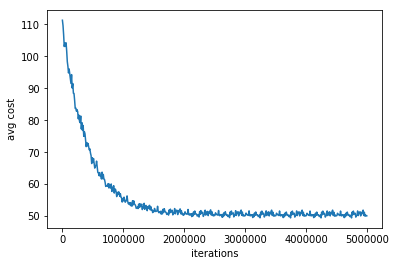

In [34]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()